Name: Shantonu Kumar Biswas
ID: 14
Project Title: Arrythmia Detection

This MIT-BIH Arrythmia dataset contains the informations of ECG 2 leads data.This dataset includes RR interval, P, Q, R, S, T peaks, QRS interval and QRS morph of Arrythmia ECG data.The data is ideal for researchers and data scientists looking to explore factors associated with Arrythmia's, develop predictive models, and conduct statistical analyses.

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [64]:
EKG1 = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\python ecg arrathmia dataset\archive\MIT-BIH Arrhythmia Database.csv')
EKG  = EKG1[:50000]
EKG

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,230,N,315,301.0,0.168109,1.230261,1.213997,1.213997,-0.045205,40,...,0.013105,49,7,68,12,0.013105,0.076036,0.195868,0.320901,0.594164
49996,230,N,301,287.0,0.192245,1.281216,1.249898,1.249898,-0.052611,36,...,0.014166,33,8,42,1,0.014166,0.046083,0.139382,0.185502,0.289061
49997,230,N,287,278.0,0.090376,-0.335180,1.545332,-1.330074,-0.085230,54,...,-0.013931,50,26,87,11,-0.013931,0.068044,0.161838,0.298375,0.511471
49998,230,N,278,277.0,0.143563,1.414680,1.403627,1.403627,-0.071551,39,...,-0.034259,51,27,89,11,-0.034259,0.045160,0.143007,0.281943,0.623478


In [65]:
null_values = EKG.isnull().sum()
print("Null values in each column:\n", null_values)
if null_values.sum() == 0:
    print("There is no empty data.")

Null values in each column:
 record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64
There is no empty data.


In [66]:
# Select features and target
features = EKG[['0_qPeak', '0_rPeak', '0_sPeak', '0_qrs_interval']] 
target = EKG['type']  # Assuming 'type' is the label for classification

# Check for missing values
print(features.isnull().sum())  # Ensure no missing values


0_qPeak           0
0_rPeak           0
0_sPeak           0
0_qrs_interval    0
dtype: int64


In [67]:
# Encode the target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Map labels for reference
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Mapping: {'F': np.int64(0), 'N': np.int64(1), 'Q': np.int64(2), 'SVEB': np.int64(3), 'VEB': np.int64(4)}


In [68]:
EKG['binary_target'] = EKG['type'].apply(lambda x: 0 if x == 'N' else 1)
target = EKG['binary_target']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17956\2520997605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EKG['binary_target'] = EKG['type'].apply(lambda x: 0 if x == 'N' else 1)


In [69]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Check shapes of train/test sets
print("Train Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)


Train Features Shape: (40000, 4)
Test Features Shape: (10000, 4)


In [70]:
# Dictionary of models
models = {
    'Support Vector Classifier': SVC(random_state=0),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Initialize a dictionary to hold the results
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train and test sets
    train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
    test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100
    
    # Store the results
    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

# Convert the results dictionary to a DataFrame
results_EKG = pd.DataFrame(results)

# Display the results
print(results_EKG)

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Model  Train Accuracy  Test Accuracy
0  Support Vector Classifier         91.0725          91.12
1        Logistic Regression         90.1400          90.28
2        K-Nearest Neighbors         95.5900          94.54
3              Random Forest        100.0000          95.69


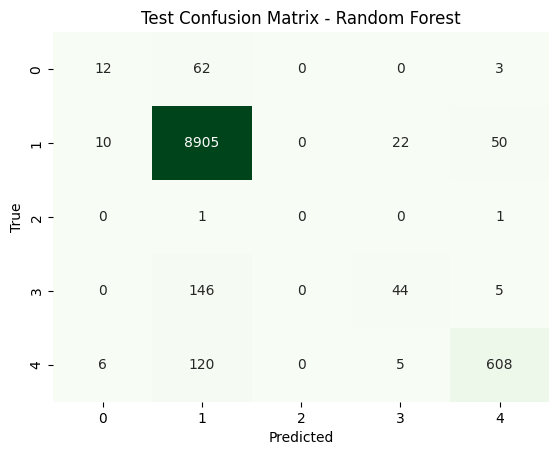

In [71]:
# Plot the confusion matrix
y_pred_test = model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Test Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()